In [1]:
import matplotlib.pyplot as plt
import numpy as np

#### Estímulo

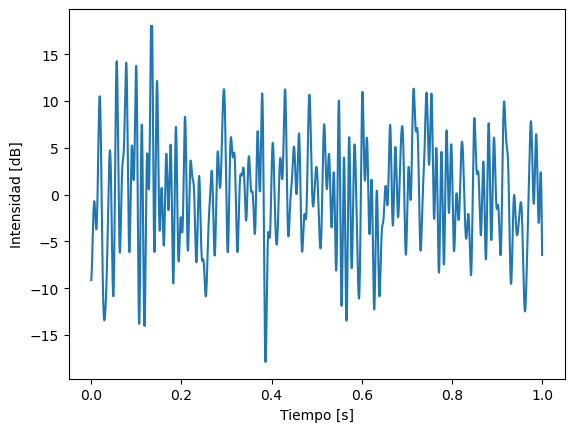

Valor medio: 0.15472830446955305


In [2]:
f_in = open('stimulus.dat', 'r')
lines = f_in.readlines()
f_in.close()

N_st = len(lines) #Tamaño del vector del estímulo
t = np.zeros(N_st) #[ms] Tiempo
st = np.zeros(N_st) #[dB] Intensidad

for i in range(N_st):
    lines[i] = lines[i].strip('\n')
    values = lines[i].split(sep = '   ')
    if(len(values) == 1):
        values = lines[i].split(sep = '\t')    

    t[i] = values[0]
    st[i] = values[1]

plt.plot(t/1e3, st)
plt.xlabel("Tiempo [s]")
plt.ylabel("Intensidad [dB]")
plt.show()


print("Valor medio: " + str(np.mean(st)))

#### Spikes

In [3]:
f_in = open('spikes.dat', 'r')
lines = f_in.readlines()
f_in.close()

N_r = len(lines) #Cantidad de realizaciones


lines[0] = lines[0].strip(' \n')
values = lines[0].split(sep = ' ')

N_s = len(values) #Cantidad de instantes de tiempo por realización

spikes = np.zeros((N_r, N_s))

for i in range(N_r):
    lines[i] = lines[i].strip(' \n')
    values = lines[i].split(sep = ' ')
    for j in range(N_s):
        spikes[i][j] = values[j]



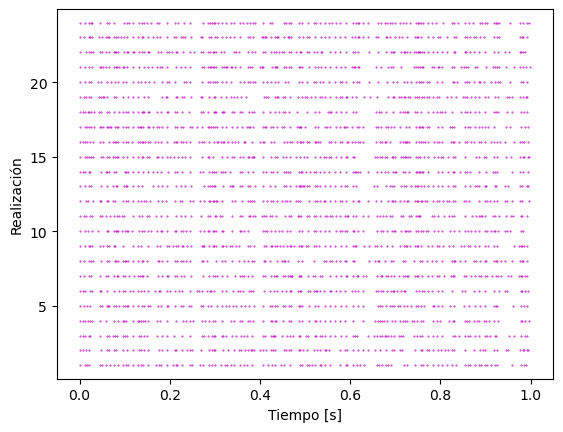

In [4]:
for i in range(25):
    plt.plot(t[0:-1]/1e3,(i)*spikes[i], 'mo', markersize = '0.4')
        

plt.ylim(0.1,24.9)
plt.xlabel("Tiempo [s]")
plt.ylabel("Realización")
plt.show()

### 1- Intervalo de tiempo entre spikes (ISI)

In [5]:
dt = 0.1 #[ms] tiempo entre intervalos
ISI = [] # Almaceno la cantidad de intervalos entre spikes


for i in range(N_r):
    ban = False #Reinicio la bandera para cada realización
    for j in range(N_s):
        if (spikes[i][j] == 1): #Encuentro un spike
            if(ban): #Si ya había encontrado uno antes en esta realización
                tiempo_isi = dt*(j-j_ant) #Calculo el tiempo entre este spike y el anterior
                ISI.append(tiempo_isi) #Almaceno en el vector ISI
                j_ant = j  #Actualizo j_ant para el próximo spike
        
            else: #Si es el primero que encuentro en esta realización
                ban = True  #Cambio la bandera a True
                j_ant = j   #Almaceno el índice de este spike


ISI = np.asarray(ISI, dtype=float)

#### Analizo la independencia del ISI entre distintos spikes

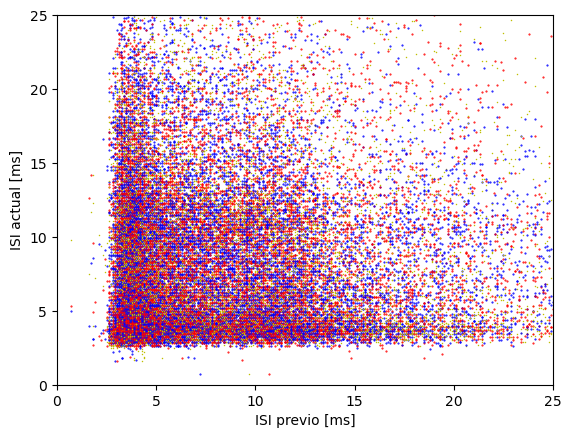

In [6]:

for i in range(3,len(ISI)):
    plt.plot(ISI[i-1], ISI[i], 'y*', markersize = '0.5')
    plt.plot(ISI[i-2], ISI[i], 'bo', markersize = '0.5')
    plt.plot(ISI[i-3], ISI[i], 'ro', markersize = '0.5')


plt.xlabel("ISI previo [ms]")
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.ylabel("ISI actual [ms]")
plt.show()

#### Histogramas condicionados

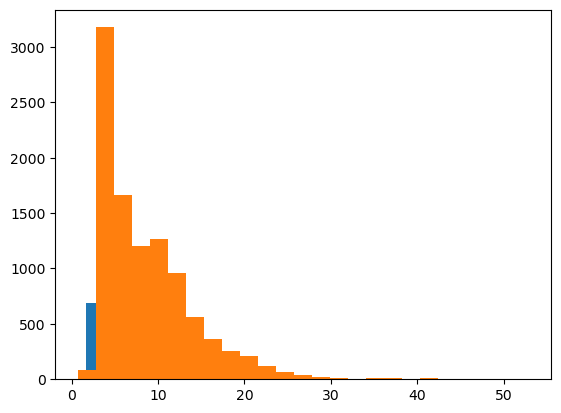

In [7]:
ISI_prima1 = []

for i in range(1, len(ISI)):
    if(ISI[i-1] < 5):
        ISI_prima1.append(ISI[i])
    
ISI_prima1 = np.asarray(ISI_prima1, dtype=float)

counts_p1, bins_p1, _ = plt.hist(ISI_prima1, bins = 25) #Obtengo los bins y las cuentas en cada uno de ellos

bin_width_p1 = bins_p1[1] - bins_p1[0] #Ancho de los bins
norm_counts_p1 = counts_p1 / (len(ISI_prima1) * bin_width_p1) #Normalizo para que el histograma aproxime la densidad de probabilidad


ISI_prima2 = []

for i in range(1, len(ISI)):
    if(ISI[i-1] < 10):
        ISI_prima2.append(ISI[i])
    
ISI_prima2 = np.asarray(ISI_prima2, dtype=float)

counts_p2, bins_p2, _ = plt.hist(ISI_prima2, bins = 25) #Obtengo los bins y las cuentas en cada uno de ellos

bin_width_p2 = bins_p2[1] - bins_p2[0] #Ancho de los bins
norm_counts_p2 = counts_p2 / (len(ISI_prima2) * bin_width_p2) #Normalizo para que el histograma aproxime la densidad de probabilidad

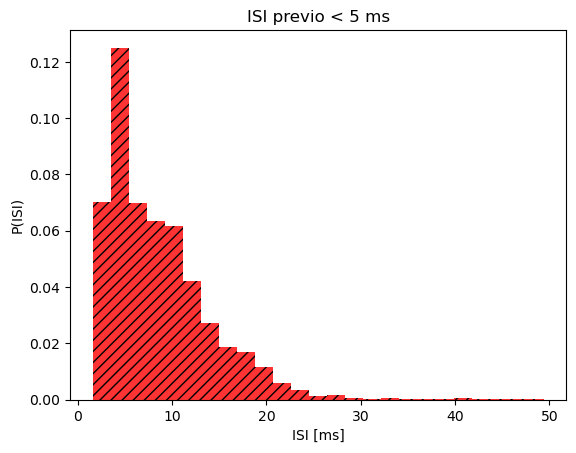

8.608263982968843
5.504616306590368


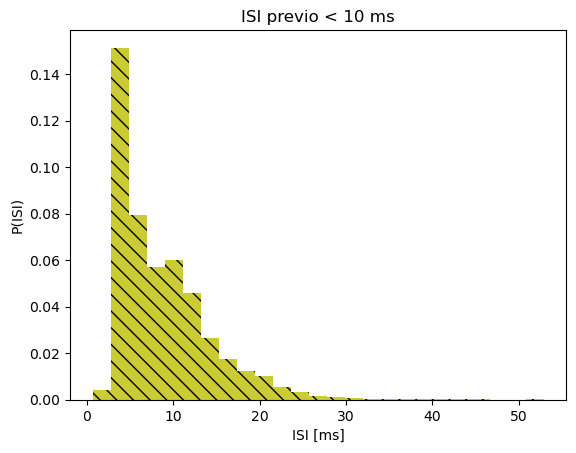

8.690053709966184
5.657860466447331


In [8]:
plt.bar(bins_p1[:-1], norm_counts_p1, width=bin_width_p1, align='edge', color = 'r', alpha = 0.8, hatch='///')
plt.xlabel("ISI [ms]")
plt.ylabel("P(ISI)")
plt.title("ISI previo < 5 ms")
plt.show()

print(np.mean(ISI_prima1))
print(np.std(ISI_prima1))

plt.bar(bins_p2[:-1], norm_counts_p2, width=bin_width_p2, align='edge', color = 'y', alpha = 0.8, hatch='\\\\')
plt.xlabel("ISI [ms]")
plt.ylabel("P(ISI)")
plt.title("ISI previo < 10 ms")
plt.show()

print(np.mean(ISI_prima2))
print(np.std(ISI_prima2))

#### Histograma

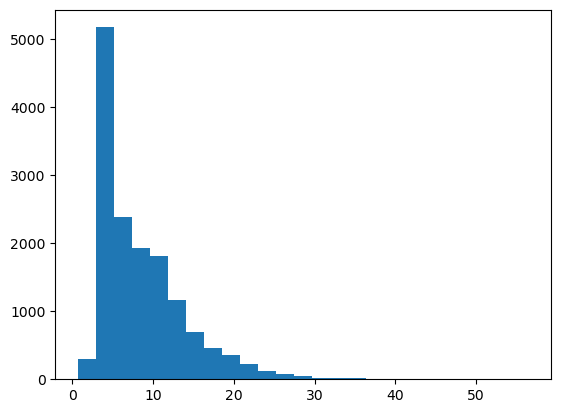

In [9]:
counts1, bins1, _ = plt.hist(ISI, bins=25) #Obtengo los bins y las cuentas en cada uno de ellos

bin_width1 = bins1[1] - bins1[0] #Ancho de los bins
norm_counts1 = counts1 / (len(ISI) * bin_width1) #Normalizo para que el histograma aproxime la densidad de probabilidad


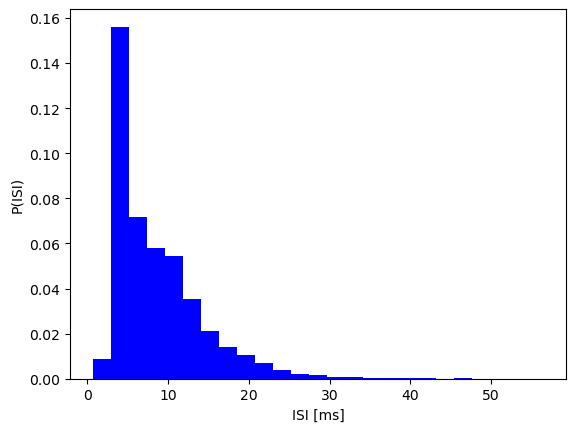

In [10]:
plt.bar(bins1[:-1], norm_counts1, width=bin_width1, align='edge', color = 'b', label = 'Total')
plt.xlabel("ISI [ms]")
plt.ylabel("P(ISI)")
plt.show()

#### Comparación entre histogramas

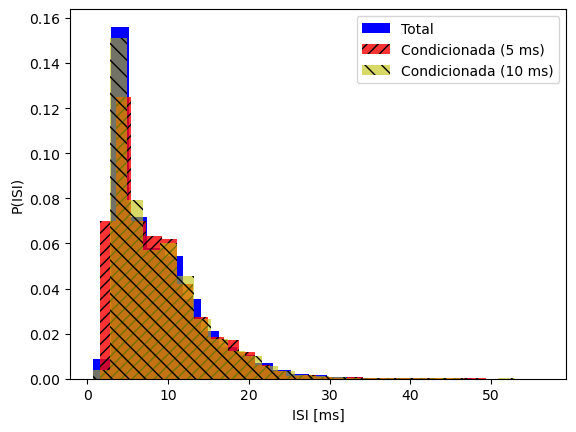

In [11]:
plt.bar(bins1[:-1], norm_counts1, width=bin_width1, align='edge', color = 'b', label = 'Total')
plt.bar(bins_p1[:-1], norm_counts_p1, width=bin_width_p1, align='edge', color = 'r', alpha = 0.8, hatch='///', label = 'Condicionada (5 ms)')
plt.bar(bins_p2[:-1], norm_counts_p2, width=bin_width_p2, align='edge', color = 'y', alpha = 0.6, hatch='\\\\', label = 'Condicionada (10 ms)')
plt.legend()
plt.xlabel("ISI [ms]")
plt.ylabel("P(ISI)")
plt.show()

#### Media, desviación estándar y coeficiente de variabilidad (CV)

In [12]:
media = np.mean(ISI)
stdv = np.std(ISI)
CV = stdv/media

print("<ISI> = " + str(media) + " ms")
print("Desv estándar = " + str(stdv) + " ms")
print("CV = " + str(CV))

<ISI> = 8.56932453363863 ms
Desv estándar = 5.632006758066682 ms
CV = 0.6572287857646663


### 2- Cantidad de spikes por realización (N)

In [13]:
N_spikes = np.zeros(N_r) 

for i in range(N_r):
    cont = 0
    for j in range(N_s):
        if (spikes[i][j] == 1):
            cont += 1
    N_spikes[i] = cont

#### Histograma

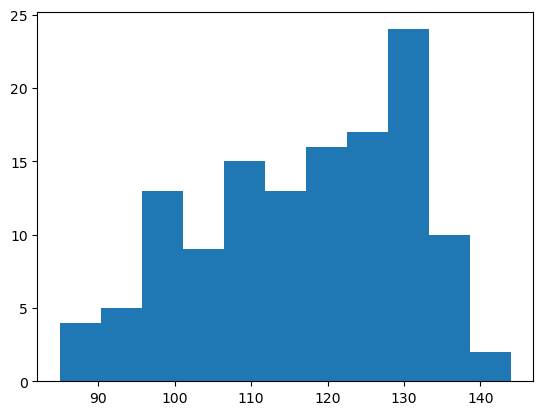

In [14]:
counts2, bins2, _ = plt.hist(N_spikes, bins=11) #Obtengo los bins y las cuentas en cada uno de ellos

bin_width2 = bins2[1] - bins2[0] #Ancho de los bins
norm_counts2 = counts2 / (len(N_spikes) * bin_width2) #Normalizo para que el histograma aproxime la densidad de probabilidad

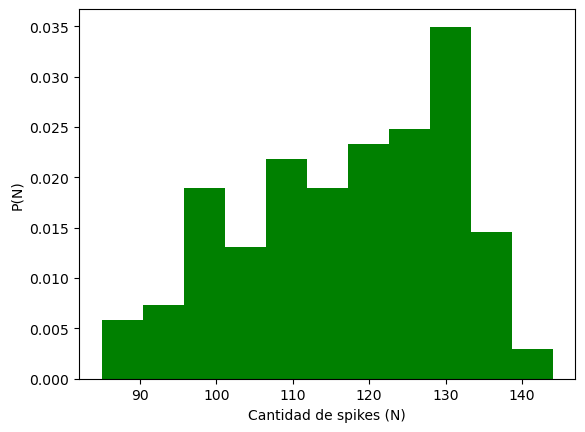

In [15]:
plt.bar(bins2[:-1], norm_counts2, width=bin_width2, align='edge', color = 'g')
plt.xlabel("Cantidad de spikes (N)")
plt.ylabel("P(N)")
plt.show()

#### Media, varianza y factor de Fano (F)

In [16]:
media = np.mean(N_spikes)
var = np.var(N_spikes)
F = var/media

print("<N> = " + str(media))
print("Varianza = " + str(var))
print("F = " + str(F))

<N> = 117.0078125
Varianza = 183.19525146484375
F = 1.5656668349803031


### 3- Tasa de disparo en función del tiempo r(t)

#### Pruebo varias ventanas de tiempo distintas

Ventana de integración: 10.1 ms
Tasa de disparo promedio: 116.61533340834082 Hz

Ventana de integración: 20.1 ms
Tasa de disparo promedio: 116.3981987384506 Hz



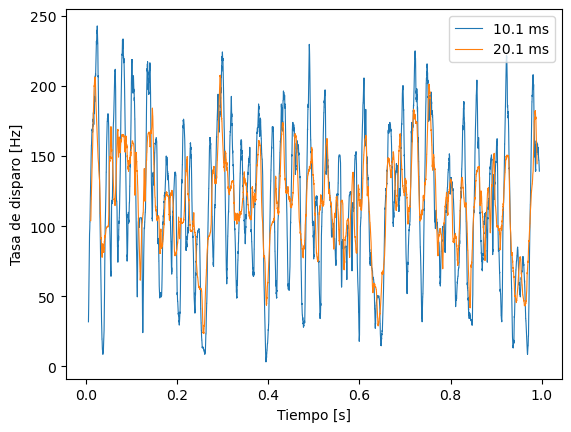

In [17]:
#ventanas = [51, 101, 201, 401, 801] #Siempre impar para tomar la misma cantidad de intervalos a la izquierda y a la derecha
ventanas = [101, 201]

#Elimino el primer spike de cada realización
for i in range(N_r):
    spikes[i][0] = 0 

for ventana1 in ventanas:

    R = N_s - ventana1 + 1 #Cantidad de elementos del vector r

    r = np.zeros(R) #Tasa de disparo en función del tiempo [1/s]
    t_r = t[int((ventana1-1)/2):int(N_s-(ventana1-1)/2)] #Vector de tiempo recortado
    st_r = st[int((ventana1-1)/2):int(N_s-(ventana1-1)/2)] #Estímulo recortado

    for j in range(int((ventana1-1)/2), int(N_s-(ventana1-1)/2)): #j es el índice para el vector de spikes
        k = int(j-(ventana1-1)/2)  #k es el índice para el vector r
        
        disparos = 0 

        #Para cada ventana de tiempo, recorro todas las realizaciones y sumo todos los spikes que entran en ella
        for i in range(N_r):
            disparos += np.sum(spikes[i][int(j-(ventana1-1)/2):int(j+(ventana1+1)/2)])

        #Promedio y obtengo la tasa por unidad de tiempo [1/s]
        r[k] = disparos/(N_r*ventana1*(dt/1000))

    plt.plot(t_r/1e3, r, label = str(np.round(ventana1*dt,1)) + " ms", lw = '0.8')
    print("Ventana de integración: " + str(np.round(ventana1*dt,1)) + " ms")
    print("Tasa de disparo promedio: " + str(np.mean(r)) + " Hz\n")

plt.legend()
#plt.xlim(0.4, 0.6)
plt.xlabel("Tiempo [s]")
plt.ylabel("Tasa de disparo [Hz]")
plt.show()


#### Una única ventana de tiempo

In [18]:
ventana1 = 151 #Siempre impar para tomar la misma cantidad de intervalos a la izquierda y a la derecha
R = N_s - ventana1 + 1 #Cantidad de elementos del vector r

print("Intervalo de integración: " + str(np.round(ventana1*dt,1)) + " ms")

r = np.zeros(R) #Tasa de disparo en función del tiempo [1/s]
t_r = t[int((ventana1-1)/2):int(N_s-(ventana1-1)/2)] #Vector de tiempo recortado
st_r = st[int((ventana1-1)/2):int(N_s-(ventana1-1)/2)] #Estímulo recortado

'''Para chequear que estoy centrando y recortando bien los vectores en función del tamaño de la ventana'''
# print("Primer elemento: " + str(int((ventana1-1)/2)) + " // Primer instante de tiempo: " + str(t_r[0]) + " ms")
# print("Ultimo elemento: " + str(int(N_s-(ventana1-1)/2)-1) + " // Ultimo instante de tiempo: " + str(t_r[-1]) + " ms")
# print("Tamaño del vector: " + str(len(t_r)))


#Elimino el primer spike de cada realización
for i in range(N_r):
    spikes[i][0] = 0 

for j in range(int((ventana1-1)/2), int(N_s-(ventana1-1)/2)): #j es el índice para el vector de spikes
    k = int(j-(ventana1-1)/2)  #k es el índice para el vector r
    
    disparos = 0 

    #Para cada ventana de tiempo, recorro todas las realizaciones y sumo todos los spikes que entran en ella
    for i in range(N_r):
        disparos += np.sum(spikes[i][int(j-(ventana1-1)/2):int(j+(ventana1+1)/2)])

    #Promedio y obtengo la tasa por unidad de tiempo [1/s]
    r[k] = disparos/(N_r*ventana1*(dt/1000))


Intervalo de integración: 15.1 ms


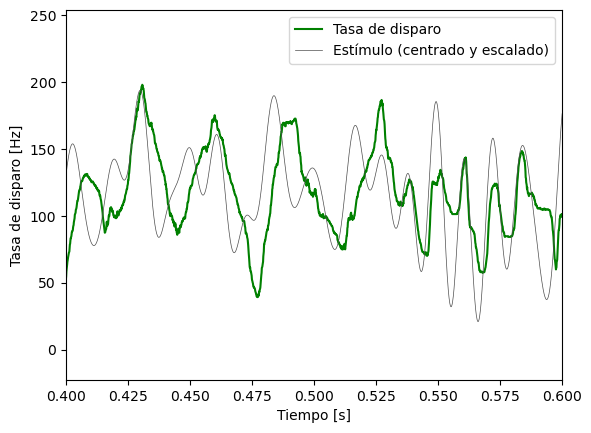

In [19]:
plt.plot(t_r/1e3, r, label = "Tasa de disparo",  color = 'g')
plt.plot(t_r/1e3, (st_r-np.mean(st_r))*7 + np.mean(r), label = "Estímulo (centrado y escalado)", lw = '0.5', color = '0.3')
plt.legend()
plt.xlabel("Tiempo [s]")
plt.ylabel("Tasa de disparo [Hz]")
plt.xlim(0.4,0.6)
#plt.title("Intervalo de integración: " + str(ventana1*dt) + " ms")
plt.show()

### 4- Predicción lineal

#### Tasa de disparo promedio

In [20]:
r0 = np.mean(r)
print("r0 = Tasa de disparo promedio = " + str(np.round(r0,1)) + " Hz")

r0 = Tasa de disparo promedio = 116.5 Hz


#### Respuesta del filtro

In [21]:
ventana2 = int(500) #Determina por cuánto tiempo determino la respuesta del filtro
duracion = ventana2*dt #Duracion de la respuesta del filtro obtenida

#Acá voy acumulando el estímulo previo a cada spike
resp = np.zeros(ventana2)
cont = 0

#Recorro las realizaciones
for i in range(N_r):
    for j in range(ventana2, N_s): #No miro los primeros {ventana} instantes de tiempo
        if (spikes[i][j] == 1):
            resp += st[j-ventana2:j]
            cont += 1


resp = np.flip(resp) #Doy vuelta para tener la respuesta del filtro en el orden correcto

#No encontramos el prefactor correcto: normalizamos la tasa de disparo predicha a mano más adelante

Máximo = 5.9118236472945895 ms
Mínimo = 12.925851703406813 ms


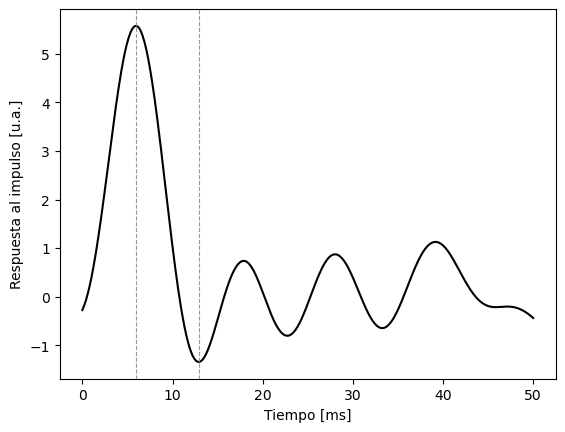

In [22]:
i_max = np.argmax(resp)
i_min = np.argmin(resp)
t_resp = np.linspace(0, duracion, ventana2, endpoint=True)

print("Máximo = " + str(t_resp[i_max]) + " ms")
print("Mínimo = " + str(t_resp[i_min]) + " ms")


plt.plot(np.linspace(0, duracion, ventana2, endpoint=True), resp/1e4, c = 'k')
plt.axvline(t_resp[i_max], c = '0.6', ls = '--', lw = '0.8')
plt.axvline(t_resp[i_min], c = '0.6', ls = '--', lw = '0.8')
plt.xlabel("Tiempo [ms]")
plt.ylabel("Respuesta al impulso [u.a.]")
plt.show()

### Extra: Tasa de disparo predicha

Lamentablemente, no logré un buen resultado

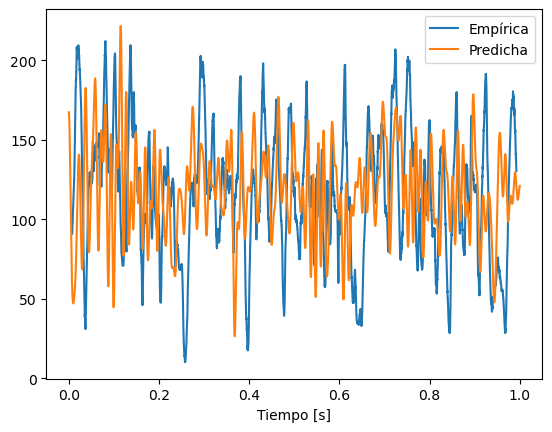

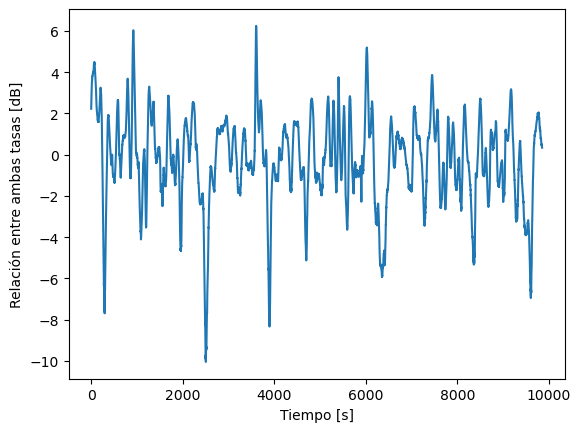

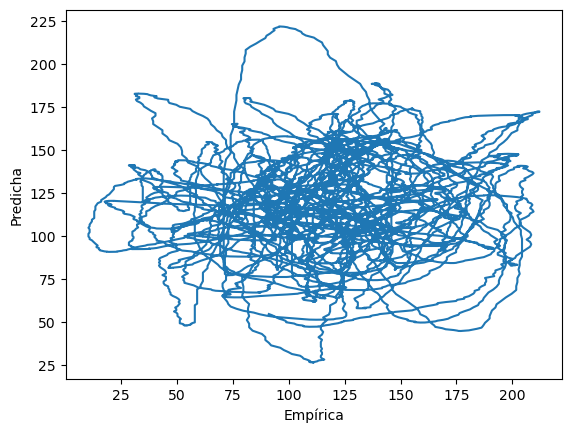

In [23]:
r_p = np.convolve(st, resp, mode='same') #Paso el estímulo por el filtro
r_p = r_p*np.max(r-r0)*1.1/np.max(r_p) #Reescaleo
r_p = r_p + r0


from scipy.signal import butter, filtfilt

order = 4  # Filter order
cutoff_frequency = 0.1  # Cutoff frequency (adjust as needed)

# Create Butterworth low-pass filter
b, a = butter(order, cutoff_frequency, btype='low')

# Apply the filter using filtfilt
filt_r_p = filtfilt(b, a, r_p)

plt.plot(t_r/1e3, r, label = "Empírica")
plt.plot(t/1e3, filt_r_p, label = "Predicha")
plt.xlabel("Tiempo [s]")
plt.legend()
plt.show()

plt.plot(10*np.log10(r/filt_r_p[int((ventana1-1)/2):int(N_s-(ventana1-1)/2)]))
plt.xlabel("Tiempo [s]")
plt.ylabel("Relación entre ambas tasas [dB]")
plt.show()


plt.plot(r, filt_r_p[int((ventana1-1)/2):int(N_s-(ventana1-1)/2)])
plt.xlabel("Empírica")
plt.ylabel("Predicha")
plt.show()



